## Author: Partha Ghosal

# Project: – Perform Scrapping on Book Store

#### Project Details

URL = "http://books.toscrape.com/index.html"

##### Objective:

Obtain Data from http://books.toscrape.com/ and use it to perform the following task. 

Obtain the

a. Pages (min 8)
b. Title
c. Prices
d. image urls
e. ratings


1. Clean your data as much as necessary and convert to a DataFrame

2. On the price column, detach the price tag from the float data points

3. Clean the Ratings column according to your data analysis skills

              a. which books are having the highest ratings?
              b. which books are having the lowest ratings?
              c. what is the total number of ratings available in the pages you obtained?

4. Which books are having the highest prices?

5. Is there any relationship between the price of a book and the ratings

6. Plot a heatmap to visualise this relationship

7. Select the books with prices greater than Â£35

8. Select the books with prices less than Â£50 and having more than two ratings

9. Save your data obtained from the web as a csv file.


### Project Execution Details Step-wise

In [1]:
# Load libraries
import requests #to make request to the required page
import bs4 #contains beautifulSoup for pulling data out of HTML and XML files
import pandas as pd #to convert our data to a dataframe

In [2]:
#creating empty lists
pages=[]
prices=[]
ratings=[]
title=[]
urls=[]

no_of_pages=1 #number of pages to be selected

#looping through the required pages and selecting the pages accordingly
for i in range(1,no_of_pages+1): #to include the last page
 url=('http://books.toscrape.com/catalogue/page-{}.html'.format(i))
 pages.append(url) #adding all the content of the respective pages to our created page list
print(pages)
len(pages)

['http://books.toscrape.com/catalogue/page-1.html']


1

#### 1. Getting the data from the particular page url and converting from object of type 'request to object of type beautiful soup, making it more readable


In [3]:

for item in pages:
 page=requests.get(item)
 soup=bs4.BeautifulSoup(page.text,'html.parser')

#print(soup)
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:30" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

##### 1a Find all the titles

In [4]:
#Find all the titles
#printing the title
for i in soup.findAll('h3'):
 titless=i.getText()
 title.append(titless)
print(len(title))

20


##### 1b Finding all the prices

In [5]:
#find all the prices
#the 'p' tag is in the 'pricecolor' class. NB. Make sure to add underscore to class (class_) in order to 
#differentiate it from python inbuilt class
for p in soup.find_all('p', class_='price_color'): 
 price=p.getText()
 prices.append(price)
print(len(prices))

20


##### 1c Finding all the ratings

In [6]:
#getting the ratings
for s in soup.find_all('p',class_='star-rating'):
 for k,v in s.attrs.items(): #to read about attr: https://www.attrs.org/en/stable/
     star=v[1]
     ratings.append(star)
    # print(star)
print(len(ratings))

20


##### 1d Finding all the url of the images

In [7]:
divs=soup.find_all('div',class_='image_container') #fetching all the div tags in the class called image_container
#print(divs)
for thumbs in divs:
 tagss=thumbs.find('img',class_='thumbnail')
 #print(tagss)
 links='http://books.toscrape.com/' + str(tagss['src'])
 newlinks=links.replace('..','')
 urls.append(newlinks)
print(len(urls))

20


##### 1e Making Dictionary

In [8]:

#Making dictionary
web_data={'Title':title,'Price':prices,'Ratings':ratings,'URL':urls}
web_data

{'Title': ['A Light in the ...',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History ...',
  'The Requiem Red',
  'The Dirty Little Secrets ...',
  'The Coming Woman: A ...',
  'The Boys in the ...',
  'The Black Maria',
  'Starving Hearts (Triangular Trade ...',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little ...",
  'Rip it Up and ...',
  'Our Band Could Be ...',
  'Olio',
  'Mesaerion: The Best Science ...',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': ['Â£51.77',
  'Â£53.74',
  'Â£50.10',
  'Â£47.82',
  'Â£54.23',
  'Â£22.65',
  'Â£33.34',
  'Â£17.93',
  'Â£22.60',
  'Â£52.15',
  'Â£13.99',
  'Â£20.66',
  'Â£17.46',
  'Â£52.29',
  'Â£35.02',
  'Â£57.25',
  'Â£23.88',
  'Â£37.59',
  'Â£51.33',
  'Â£45.17'],
 'Ratings': ['Three',
  'One',
  'One',
  'Four',
  'Five',
  'One',
  'Four',
  'Three',
  'Four',
  'One',
  'Two',
  'Four',
  'Five',
  'Five',
  'Five',
  'Three',
  'One',
  'One'

### 2 Converting dictionary to dataframe. 

In [9]:

df=pd.DataFrame(web_data)
df.index+=1 #changing the index to start from 1 to 20 instead of 0 to 19
df.head()

,Title,Price,Ratings,URL
1,A Light in the ...,Â£51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,Â£53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,Â£50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,Â£47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,Â£54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...


### 3 Remove currency symbol from price column. 

In [10]:

#[x.strip('Â£') for x in df.Price]
df['Price']=df['Price'].str.replace('Â£','')
df

,Title,Price,Ratings,URL
1,A Light in the ...,51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
6,The Requiem Red,22.65,One,http://books.toscrape.com//media/cache/68/33/6...
7,The Dirty Little Secrets ...,33.34,Four,http://books.toscrape.com//media/cache/92/27/9...
8,The Coming Woman: A ...,17.93,Three,http://books.toscrape.com//media/cache/3d/54/3...
9,The Boys in the ...,22.60,Four,http://books.toscrape.com//media/cache/66/88/6...
10,The Black Maria,52.15,One,http://books.toscrape.com//media/cache/58/46/5...


### 4&5 Sorting price column to see the highest price

In [11]:

df.sort_values(by='Price',ascending=False)
#df

,Title,Price,Ratings,URL
16,Our Band Could Be ...,57.25,Three,http://books.toscrape.com//media/cache/54/60/5...
5,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
2,Tipping the Velvet,53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
14,Scott Pilgrim's Precious Little ...,52.29,Five,http://books.toscrape.com//media/cache/94/b1/9...
10,The Black Maria,52.15,One,http://books.toscrape.com//media/cache/58/46/5...
1,A Light in the ...,51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
19,Libertarianism for Beginners,51.33,Two,http://books.toscrape.com//media/cache/0b/bc/0...
3,Soumission,50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
20,It's Only the Himalayas,45.17,Two,http://books.toscrape.com//media/cache/27/a5/2...


#### Convert the rating column to an integer from a string

In [12]:
df['Ratings']=df['Ratings'].replace({'Three':3,'One':1,'Two':2,'Four':4,'Five':5})
df

,Title,Price,Ratings,URL
1,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...
6,The Requiem Red,22.65,1,http://books.toscrape.com//media/cache/68/33/6...
7,The Dirty Little Secrets ...,33.34,4,http://books.toscrape.com//media/cache/92/27/9...
8,The Coming Woman: A ...,17.93,3,http://books.toscrape.com//media/cache/3d/54/3...
9,The Boys in the ...,22.60,4,http://books.toscrape.com//media/cache/66/88/6...
10,The Black Maria,52.15,1,http://books.toscrape.com//media/cache/58/46/5...


#### Check the data type


In [13]:
df.dtypes

Title      object
Price      object
Ratings     int64
URL        object
dtype: object

#### Convert the price column from object to float

In [14]:

df['Price']=df.Price.astype(float)
df.dtypes

Title       object
Price      float64
Ratings      int64
URL         object
dtype: object

### 6. Correlation between the ratings of the product and the price

In [15]:
df.corr()

,Price,Ratings
Price,1.000000,-0.075857
Ratings,-0.075857,1.000000


### 7. Data visualization using heatmap

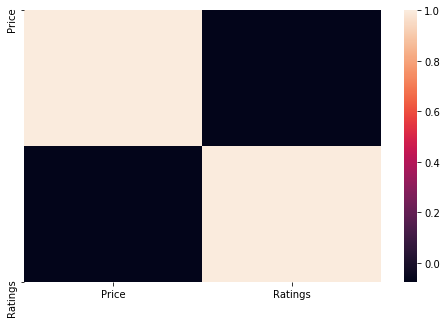

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(df.corr())

### 8. Select the books with prices greater than Â£35

In [18]:
df[df.eval("Price>=35.00")]

,Title,Price,Ratings,URL
1,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...
10,The Black Maria,52.15,1,http://books.toscrape.com//media/cache/58/46/5...
14,Scott Pilgrim's Precious Little ...,52.29,5,http://books.toscrape.com//media/cache/94/b1/9...
15,Rip it Up and ...,35.02,5,http://books.toscrape.com//media/cache/81/c4/8...
16,Our Band Could Be ...,57.25,3,http://books.toscrape.com//media/cache/54/60/5...
18,Mesaerion: The Best Science ...,37.59,1,http://books.toscrape.com//media/cache/09/a3/0...


### 9. Select the books with prices less than Â£50 and having more than two ratings

In [19]:

df[df.eval("Price<50.00" and "Ratings>2")]

,Title,Price,Ratings,URL
1,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...
4,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...
7,The Dirty Little Secrets ...,33.34,4,http://books.toscrape.com//media/cache/92/27/9...
8,The Coming Woman: A ...,17.93,3,http://books.toscrape.com//media/cache/3d/54/3...
9,The Boys in the ...,22.60,4,http://books.toscrape.com//media/cache/66/88/6...
12,Shakespeare's Sonnets,20.66,4,http://books.toscrape.com//media/cache/10/48/1...
13,Set Me Free,17.46,5,http://books.toscrape.com//media/cache/5b/88/5...
14,Scott Pilgrim's Precious Little ...,52.29,5,http://books.toscrape.com//media/cache/94/b1/9...
15,Rip it Up and ...,35.02,5,http://books.toscrape.com//media/cache/81/c4/8...


### 10. Save your data obtained from the web as a csv file.

In [21]:
df.to_csv('webScrapData.csv', index=False)